In [1]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

/home/vladislave/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


1. С помощью метода квадратур найдите приближенное решение уравнения

$y(x) = \dfrac 5 6 x + \dfrac 1 2 \int \limits_0^1 {xsy(s)ds}; x ∈ [0,1]$

Линейное уравнение Фредгольма II рода имеет следующий вид:\
$y(x) = f(x) + \lambda \int \limits_a^b {K(x,s)y(s)ds}$\
$y(x_i) − \lambda \int \limits_a^b {K(x_i, s)y(s)ds} = f(x_i), \text{  } i = 1,2, ... n.$\
$y(x_i) − \lambda \sum \limits_{j=1}^n {A_jK_{ji}y_j} = f_i, \text{  } i = 1,2, ... n.$

Cетка $x_1, x_2, ... , x_n$ равномерная с шагом $h$. Используем квадратурную формулу трапеций. Тогда система линейных алгебраических уравнений примет
следующий вид:

$y_i − h\lambda \sum \limits_{j=1}^n {w_jK_{ji}y_j} = f_i, \text{  } i = 1,2, ... n.$

где $w_1 = w_n = 1/2$, 

$w_j = 1,j = 2,3, ... n − 1$.

In [4]:
f = lambda x: 5/6 * x
Lambda = 1/2
K = lambda x, s: x * s

h = 0.05
x1 = np.arange(0, 1, h).reshape(-1, 1) # Переводим в вектор-столбец
n = len(x1)

# Заполнение матрицы X
X = np.eye(n)  # Инициализация единичной матрицы
for j in range(n):
    weight = 1/2 if j == 0 or j == n-1 else 1 # Обработка крайних значений
    for i in range(n):
        X[i, j] -= h * Lambda * weight * K(x1[i][0], x1[j][0])

Y = f(x1)
# Решение системы уравнений
approx1 = np.linalg.solve(X, Y)

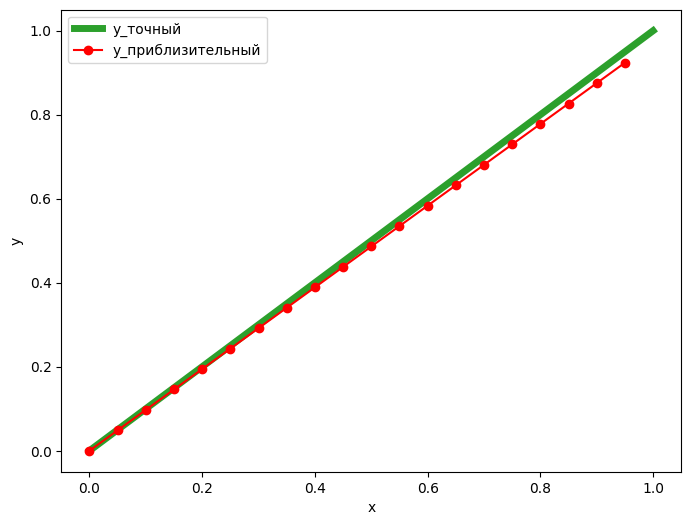

In [6]:
# строим график
x1_exact = np.linspace(0, 1, 10)
exact1 = x1_exact

plt.figure(figsize=(8, 6))
plt.plot(x1_exact, exact1, color='C2', linewidth=5, label='y_точный')
plt.plot(x1, approx1, '-or', label='y_приблизительный')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

2. Решить следующие уравнение с помощью аппроксимации ядра вырожденным:

$y(x) + \int \limits_0^1 {x(e^{xs} − 1)y(s)ds}= e^x − 1; \text{  }x ∈ [0,1]$\
$y(x) = e^x − 1 - \int \limits_0^1 {x(e^{xs} − 1)y(s)ds}$

$K(x,s) = \sum \limits_i f_i(x_i)g_i(s_i)$\
$y(x) = f(x) + \lambda \int \limits_a^b {K(x,s)y(s)ds}$

Ядро не вырожденное, представим как Ряд Тейлора:\
$e^{xs} - 1 = xs + \dfrac{x^2s^2}{2!}+ \dfrac{x^3s^2}{3!} + ... = \sum \limits_{n=1}^\infty {\dfrac{x^ns^n}{n!}}$

/tmp/ipykernel_6452/4195016847.py:29: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  approx2 = f(x2) + Lambda * np.sum(C[i]*alpha(x2)[i] for i in range(2))


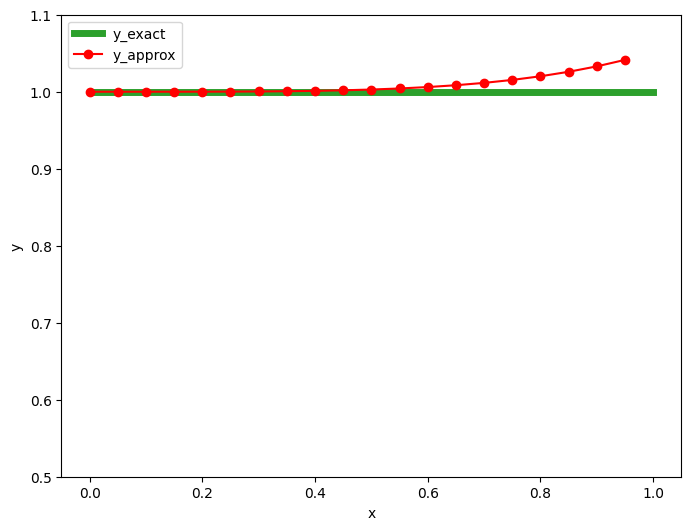

In [5]:
def alpha(t):
    return [t**2, t**3, t**4, t**5]

def beta(t):
    return [t, 1/2*t**2, 1/6*t**3, 1/24*t**4]

def bfun(t, m, f):
    return beta(t)[m]*f(t)

def Aijfun(t, m, k):
    return beta(t)[m]*alpha(t)[k]

a2 = 0
b2 = 1
Lambda = -1
x2 = np.arange(a2, b2, h)
f = lambda t: np.exp(t) - t

n = len(alpha(0))
X = np.eye(n)
Y = np.zeros((n, 1))

for i in range(n):
    Y[i] = quad(bfun, a2, b2, args=(i, f))[0]
    for j in range(n):
        X[i][j] -= Lambda * quad(Aijfun, a2, b2, args=(i, j))[0]

C = np.linalg.solve(X, Y)
approx2 = f(x2) + Lambda * np.sum(C[i]*alpha(x2)[i] for i in range(2))


x2_exact = np.linspace(a2, b2, 10)
exact2 = np.ones(len(x2_exact))

plt.figure(figsize=(8, 6))
plt.plot(x2_exact, exact2, color='C2', linewidth=5, label='y_exact')
plt.plot(x2, approx2, '-or', label='y_approx')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.ylim(0.5, 1.1)
plt.show()

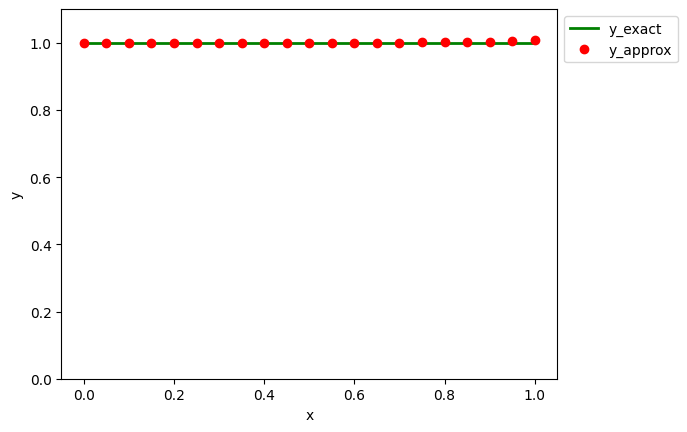

In [9]:
import scipy.integrate as integrate
a = 0
b = 1.001
h = 0.05
Lambda = -1
x = np.arange(a, b, h)
x = x.reshape(len(x), 1)
n = len(x)

f = lambda t: np.exp(t) - t
y_exact = lambda t: 1  # точное решение

y = []  # точное решение
for i in range(n):
    y.append([])  # создаем пустую строку
    y[i].append(y_exact(x[i]))
y = np.array(y).reshape(n, 1)  # точное решение

def Solve(a, b, f, t, Lambda):

    alpha = lambda t: [-t, t, t ** 2, t ** 3, t ** 4]
    beta = lambda t: [1, 1, t, 0.5 * t ** 2, 1 / 6 * t ** 3]

    def bfun(t, m, f):
        return beta(t)[m] * f(t)

    def Aijfun(t, m, k):
        return beta(t)[m] * alpha(t)[k]

    m = len(alpha(0))  # определяем размер alpha
    M = np.zeros((m, m))
    r = np.zeros((m, 1))

    for i in range(m):
        r[i] = integrate.quad(bfun, a, b, args=(i, f))[0]
        for j in range(m):
            M[i][j] = -Lambda * integrate.quad(Aijfun, a, b, args=(i, j))[0]

    for i in range(m):
        M[i][i] = M[i][i] + 1

    c = np.linalg.solve(M, r)
    aij = np.array(alpha(t))

    return Lambda * (np.sum(c[:, np.newaxis] * aij, axis=0)) + f(t)

y_approx = Solve(a, b, f, x, Lambda)
plt.plot(x, y, '-g', linewidth=2, label='y_exact')  # график точного решения
plt.plot(x, y_approx, 'or', label='y_approx')  # график найденного решения
plt.xlabel("x")
plt.ylabel("y")
plt.legend('1', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0, max(y) + 0.1])
plt.show()